In [24]:
import pandas as pd
import os
import requests
import yaml
import matplotlib.pyplot as plt

In [25]:
df = pd.read_json("../data/dummy.json")
df

,X,y
0,49.706449,122.973964
1,12.525859,15.585690
2,82.520417,178.759885
3,59.131192,134.193423
4,91.219246,208.842205
...,...,...
95,15.801725,44.366357
96,84.280278,175.476124
97,95.173662,214.342311
98,16.373628,29.175130


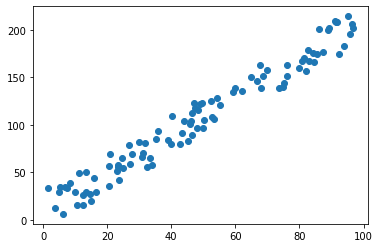

In [26]:
plt.scatter(df["X"], df["y"])

In [34]:
def create_tf_serving_json(data):
    return {
        "inputs": {name: data[name].tolist() for name in data.keys()}
        if isinstance(data, dict)
        else data.tolist()
    }


def score_model(dataset):
    url = os.getenv("DB_API_URL")
    headers = {"Authorization": f'Bearer {os.environ.get("DATABRICKS_TOKEN")}'}
    data_json = (
        dataset.to_dict(orient="split")
        if isinstance(dataset, pd.DataFrame)
        else create_tf_serving_json(dataset)
    )
    response = requests.request(method="POST", headers=headers, url=url, json=data_json)
    if response.status_code != 200:
        raise Exception(
            f"Request failed with status {response.status_code}, {response.text}"
        )
    return response.json()

In [35]:
df["prediction"] = [d["0"] for d in score_model(df[["X"]])]
df

,X,y,prediction
0,49.706449,122.973964,60.795708
1,12.525859,15.585690,14.990952
2,82.520417,178.759885,101.220993
3,59.131192,134.193423,72.406555
4,91.219246,208.842205,111.937546
...,...,...,...
95,15.801725,44.366357,19.026667
96,84.280278,175.476124,103.389061
97,95.173662,214.342311,116.809204
98,16.373628,29.175130,19.731226


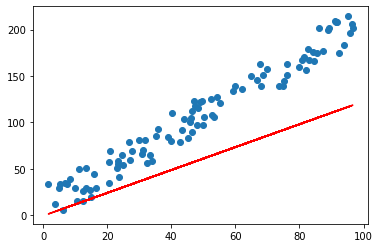

In [36]:
plt.scatter(df["X"], df["y"])
plt.plot(df["X"], df["prediction"], "r")